In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import ISLP as isl
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [256]:
df = pd.read_csv('../data/paint.csv')
df.head()

,Relative humidity (%),type,Evaporation (% wt)
0,35.3,1,11.2
1,29.6,1,11.0
2,31.0,1,12.6
3,58.0,1,8.3
4,62.0,1,10.1


In [257]:
# Exploratory Data Analysis
# Check for missing values
df.isnull().sum()

Relative humidity (%)    0
type                     0
Evaporation (% wt)       0
dtype: int64

In [258]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Relative humidity (%),31.0,52.470968,16.479972,28.0,37.2,56.0,70.0,77.0
type,31.0,0.516129,0.508001,0.0,0.0,1.0,1.0,1.0
Evaporation (% wt),31.0,8.022581,2.461667,4.0,6.0,8.0,9.3,13.0


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Relative humidity (%)  31 non-null     float64
 1   type                   31 non-null     int64  
 2   Evaporation (% wt)     31 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 876.0 bytes


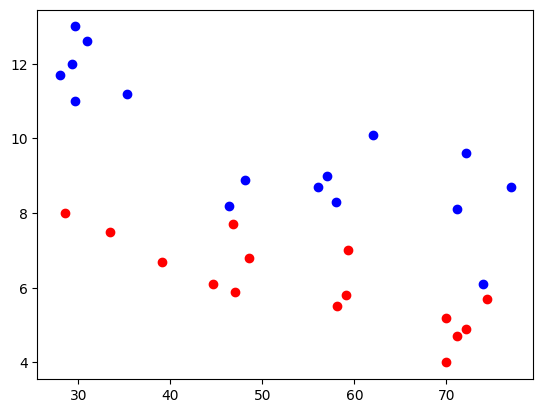

In [260]:
splitA = df[df['type'] == 1] # 1 is the type of paint
splitB = df[df['type'] == 0] # 0 is the type of paint
splitA, splitB

X_A = splitA['Relative humidity (%)']
X_B = splitB['Relative humidity (%)']
y_A = splitA['Evaporation (% wt)']
y_B = splitB['Evaporation (% wt)']

# Scatter plot of the data
plt.scatter(X_A, y_A, color='blue', label='Type A')
plt.scatter(X_B, y_B, color='red', label='Type B')

<Axes: xlabel='Relative humidity (%)', ylabel='Evaporation (% wt)'>

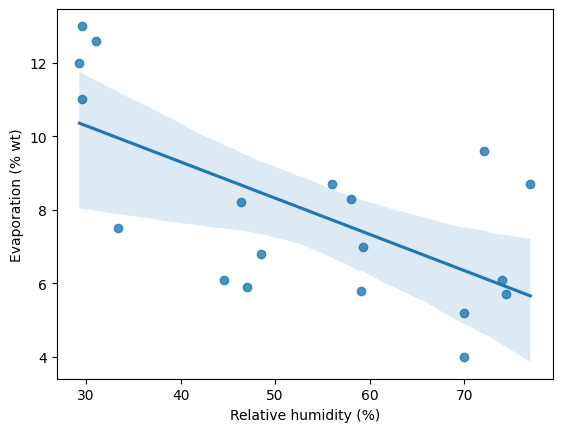

In [261]:
test = df.sample(frac=0.4, random_state=42, replace=False)
train = df.drop(test.index)

Y = train['Evaporation (% wt)']
X = train['Relative humidity (%)']

df.insert(0, 'intercept', 1)

# Create plot with ci bands
sns.regplot(x='Relative humidity (%)', y='Evaporation (% wt)', data=train, ci=95)
#sns.regplot(x='Relative humidity (%)', y='Evaporation (% wt)', data=train, order=95, ci=None, scatter_kws={'color':'r', 's':9}, line_kws={'color':'b'}) 

In [262]:
X, Y= df.drop('Evaporation (% wt)', axis='columns'), df['Evaporation (% wt)']
b = np.linalg.inv(X.T @ X) @ X.T @ Y

b



0    10.380477
1    -0.078101
2     3.371559
dtype: float64

In [263]:
# Fit the model
model = LinearRegression()
model.fit(X, Y)
model.score(X, Y) # R^2


0.8589742783160937

In [264]:
X = X.to_numpy()
Y = Y.to_numpy()
v = len(b)-1 # number of variables
n = len(Y)
SSE = np.sum(np.square(Y - (X @ b)))
var = SSE/(n-v-1)
S = np.sqrt(var)

# Regression sum of squares, total variance
SSR = np.sum(b*(X.T @ Y)) - (np.square(np.sum(Y))/n)
Syy = np.sum(np.square(Y)) - (np.square(np.sum(Y))/n)

# Significant regression test, test rejects for large values
sig_statistic = (SSR/v)/var

# P score for H0 in significance test is very close to 0,
# -- we reject the hypothesis that no variable is relevant
p_sig = stats.f.sf(sig_statistic, v, n-v-1)

p_sig


1.2307692354915358e-12

In [265]:
# calcutate the significance of the model
n = len(Y)
p = model.rank_
F = (SST - SSE) / (SSE / (n - p - 1))

# Calculate the p-value
p_value =  stats.f.sf(F, p, n - p - 1)
p_value

2.0909772235955126e-16